In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [15]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [13]:
# Símbolo del IPC de México en Yahoo Finance
ipc = '^MXX'

# Símbolo de GRUMA en Yahoo Finance
gruma = 'GRUMAB.MX'

# Obtener datos históricos del IPC de México desde el 1 de enero de 2020 hasta el 25 de febrero de 2023
ipc_data = yf.download(ipc, start='2019-01-01', end='2023-02-24')

# Obtener datos históricos de GRUMA desde el 1 de enero de 2020 hasta el 25 de febrero de 2023
gruma_data = yf.download(gruma, start='2019-01-01', end='2023-02-24')

# Crear un DataFrame con los precios de cierre ajustados del IPC de México y GRUMA
data = pd.DataFrame({'IPC': ipc_data['Adj Close'], 'GRUMA': gruma_data['Adj Close']})

# Calcular los rendimientos diarios de los precios de cierre ajustados
returns = data.pct_change().dropna()

# Crear una variable para representar las expectativas de los agentes económicos
expectations = returns.shift(-1)

expectations.dropna(inplace=True)
print(expectations)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                 IPC     GRUMA
Date                          
2019-01-03  0.009771  0.004414
2019-01-04  0.008929  0.005426
2019-01-07  0.016545  0.001606
2019-01-08  0.002416 -0.008817
2019-01-09  0.000478  0.010154
...              ...       ...
2023-02-16 -0.004187 -0.000710
2023-02-17  0.002211  0.006116
2023-02-20 -0.012403 -0.004980
2023-02-21 -0.001107  0.012888
2023-02-22 -0.001792  0.014708

[1044 rows x 2 columns]


In [14]:

# Estimar un modelo de regresión lineal para los rendimientos de GRUMA en función de los rendimientos del IPC de México y las expectativas de los agentes económicos
model = sm.OLS(returns['GRUMA'], sm.add_constant(pd.concat([returns['IPC'], expectations], axis=1))).fit()

# Imprimir los resultados de la regresión
#print(model.summary())



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


MissingDataError: ignored

In [112]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime

# Especificar fechas de inicio y fin para los datos históricos
start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 2, 24)


In [126]:

# Obtener datos históricos del IPC de México desde el 1 de enero de 2020 hasta el 25 de febrero de 2023
ipc_data = yf.download(ipc, start='2022-01-01', end='2023-02-24')

# Obtener datos históricos de GRUMA desde el 1 de enero de 2020 hasta el 25 de febrero de 2023
gruma_data = yf.download(gruma, start='2022-01-01', end='2023-02-24')
#us_treasury_data =yf.download('^TNX', start='2022-02-25', end='2023-02-24')
df = pd.read_csv("/content/Bonos.csv").dropna()


#df = df.set_index('Date')

df = df.set_index(gruma_data.index)


#liverpool_data = yf.download('LIVEPOL1.MX', start='2022-02-25', end='2023-02-24')


# Seleccionar los precios de cierre ajustados
ipc_closes = ipc_data['Adj Close']
gruma_closes = gruma_data['Adj Close']
us_treasury_closes = df['BONOS']
#us_treasury_closes = pd.Series(us_treasury_closes,index= test)
#liverpool_closes = liverpool_data['Adj Close']
liverpool_closes = df[' LIVERPOOL ']

gruma_dates = gruma_data.index

# Calcular los rendimientos diarios # rentabilidad
ipc_daily_returns = ipc_closes.pct_change().dropna()
gruma_daily_returns = gruma_closes.pct_change().dropna()
us_treasury_daily_returns = us_treasury_closes.pct_change().dropna()
liverpool_daily_returns = liverpool_closes.pct_change().dropna()

#print(liverpool_closes)
#print(gruma_daily_returns)

#print(ipc_data.index)
#print(gruma_dates)

print(us_treasury_daily_returns)
#print(ipc_data)
test = pd.DataFrame({
    'IPC': ipc_daily_returns,
    'GRUMA': gruma_daily_returns,
    'US_TREASURY': us_treasury_daily_returns,
    'LIVERPOOL': liverpool_daily_returns
})

print(test)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Date
2022-01-04    0.000000
2022-01-05   -0.075377
2022-01-06   -0.070652
2022-01-07    0.093567
2022-01-10   -0.016043
                ...   
2023-02-17    0.008671
2023-02-20    0.008596
2023-02-21    0.000000
2023-02-22    0.008523
2023-02-23   -0.005634
Name: BONOS, Length: 289, dtype: float64
                 IPC     GRUMA  US_TREASURY  LIVERPOOL
Date                                                  
2022-01-04  0.001431  0.000762     0.000000   0.011703
2022-01-05  0.000139 -0.005813    -0.075377   0.036851
2022-01-06  0.000588 -0.007231    -0.070652  -0.006121
2022-01-07  0.002767 -0.008524     0.093567  -0.021953
2022-01-10 -0.006886  0.021727    -0.016043   0.004570
...              ...       ...          ...        ...
2023-02-17 -0.004187 -0.000710     0.008671   0.000000
2023-02-20  0.002211  0.006116     0.008596   0.000000
2023-02-21 -0

In [161]:

# Crear un DataFrame con los rendimientos diarios de ambas acciones
#df = pd.DataFrame({'IPC': ipc_daily_returns, 'GRUMA': gruma_daily_returns})
#print(df)


df = pd.DataFrame({
    'IPC': ipc_daily_returns,
    'GRUMA': gruma_daily_returns,
    'US_TREASURY': us_treasury_daily_returns,
    'LIVERPOOL': liverpool_daily_returns
})

print(df)


                 IPC     GRUMA  US_TREASURY  LIVERPOOL
Date                                                  
2022-01-04  0.001431  0.000762     0.000000   0.011703
2022-01-05  0.000139 -0.005813    -0.075377   0.036851
2022-01-06  0.000588 -0.007231    -0.070652  -0.006121
2022-01-07  0.002767 -0.008524     0.093567  -0.021953
2022-01-10 -0.006886  0.021727    -0.016043   0.004570
...              ...       ...          ...        ...
2023-02-17 -0.004187 -0.000710     0.008671   0.000000
2023-02-20  0.002211  0.006116     0.008596   0.000000
2023-02-21 -0.012403 -0.004980     0.000000   0.000000
2023-02-22 -0.001107  0.012888     0.008523   0.000000
2023-02-23 -0.001792  0.014708    -0.005634   0.000000

[289 rows x 4 columns]


In [162]:
print(test.columns)

Index(['IPC', 'GRUMA', 'US_TREASURY', 'LIVERPOOL'], dtype='object')


In [166]:
#CALCULAMOS LA RENTABILIDAD, VOLATILIDAD Y MARGINAALIDAD 

suma_IPC = np.sum(df['IPC'])
suma_GRUMA = np.sum(df['GRUMA'])
suma_US_TREASURY = np.sum(df['US_TREASURY'])
suma_LIVERPOOL = np.sum(df['LIVERPOOL'])

print(suma_IPC*100)
print(suma_GRUMA*100)
print(suma_US_TREASURY*100)
print(suma_LIVERPOOL*100)


1.8437746333380245
7.783610478467173
66.15599513517223
17.491675245664883


In [168]:
pro_IPC = np.mean(df['IPC'])
pro_GRUMA = np.mean(df['GRUMA'])
pro_US_TREASURY = np.mean(df['US_TREASURY'])
pro_LIVERPOOL = np.mean(df['LIVERPOOL'])

print(pro_IPC*100)
print(pro_GRUMA*100)
print(pro_US_TREASURY*100)
print(pro_LIVERPOOL*100)


0.00637984302193088
0.02693290822999022
0.22891347797637449
0.06052482783967088


In [144]:

# Calcular la matriz de coorelación de los rendimientos diarios
cor_matrix = df.corr()
print(cor_matrix)

                  IPC     GRUMA  US_TREASURY  LIVERPOOL
IPC          1.000000  0.384429     0.018547  -0.065782
GRUMA        0.384429  1.000000    -0.013749  -0.038184
US_TREASURY  0.018547 -0.013749     1.000000  -0.026287
LIVERPOOL   -0.065782 -0.038184    -0.026287   1.000000


In [148]:

# Calcular la matriz de covarianza de los rendimientos diarios
cov_matrix = df.cov()


print(cov_matrix)

                  IPC     GRUMA  US_TREASURY  LIVERPOOL
IPC          0.000109  0.000076     0.000005  -0.000010
GRUMA        0.000076  0.000355    -0.000006  -0.000010
US_TREASURY  0.000005 -0.000006     0.000612  -0.000009
LIVERPOOL   -0.000010 -0.000010    -0.000009   0.000196


In [157]:
# Calcular la raíz cuadrada de la matriz Volatilidad
#print(np.sqrt())
#print (cov_matrix.iloc[1, 1])
#print (cov_matrix.iloc[2, 2])
#print (cov_matrix.iloc[3, 3])

R_GRUMA = np.sqrt(cov_matrix.iloc[1, 1])
R_BONOS = np.sqrt(cov_matrix.iloc[2, 2])
R_LIVERPOOL = np.sqrt(cov_matrix.iloc[3, 3])

print(R_GRUMA)
print(R_BONOS)
print(R_LIVERPOOL)



0.018851823048696283
0.02474323616950425
0.014014633745095706


Rendimiento óptimo de la cartera: 34.06%
Volatilidad óptima de la cartera: 20.51%


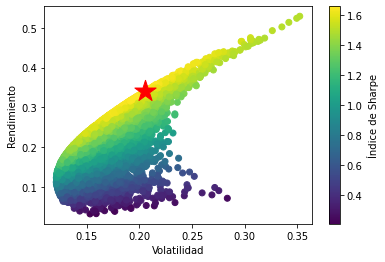

In [141]:
# Calcular los rendimientos y la volatilidad de los portfolios generados aleatoriamente
num_portfolios = 10000
results = np.zeros((3,num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(4)
    weights /= np.sum(weights)
    portfolio_return = np.sum(weights * df.mean()) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]



# Encontrar la cartera con el mayor índice de Sharpe
max_sharpe_idx = np.argmax(results[2])
optimal_portfolio_return = results[0,max_sharpe_idx]
optimal_portfolio_std_dev = results[1,max_sharpe_idx]

# Imprimir los resultados
print("Rendimiento óptimo de la cartera: {:.2f}%".format(optimal_portfolio_return * 100))
print("Volatilidad óptima de la cartera: {:.2f}%".format(optimal_portfolio_std_dev * 100))

# Graficar la frontera eficiente
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Índice de Sharpe')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.scatter(optimal_portfolio_std_dev, optimal_portfolio_return, marker='*', s=500, c='r')
plt.show()